# Telecom Churn Prediction 

**IST707 FINAL PROJECT**
- **Students**: Jenny Cao (jcao21@syr.edu), Jieer Chen (jchen257@syr.edu), Xiaodan Yu (xuy148@syr.edu)
- **School**: Whitman School of Management, Syracuse University
- **Date**: 12/11/2020

**Abstract**

Customer churn has been an important topic in the telecom industry because it directly affects company’s profitability. Churn describes that customers stop using a company’s product or service.


- **Project Goal:** This project aims to predict whether a telecom customer will churn. 
- **Data:** We are using the telecom customer churn data originally provided by the IBM Watson Analytics and available in Kaggle. 
- **Models:** We applied three types of mining algorithms, classification, regression, and clustering to this binary classification problem. The specific models we used are random forest, gradient boosting machine, logistic regression and K-Nearest Neighbors.

**Data**


Downloaded from Kaggle, the telecom customer churn dataset contains 7043 rows (customers) and 21 columns (features). Each row represents a customer and includes information about 
- customers who left within the last month - The target column is “Churn” which has binary values, ‘Yes’ or ‘No’.
- services that each customer has signed up for such as phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- demographic info about customers such as gender, age range, and if they have partners and dependents. 

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
import missingno as msno
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data preparation

- **A quick look at the data**

In [3]:
# import the csv file into the jupyter notebook by using pandas and show the dataframe.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

- **Raw data: 7043 rows and 21 columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- **No duplicate rows found**

In [5]:
len(df.customerID.unique())
# since all the record id are unique, which means there is no duplicate rows.

7043

- **Eleven missing values on TotalCharges Column** 

In [6]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- **Drop missing values**

In [7]:
#After we convert the TotalCharges into numerical data, there are 11 missing values. 
#Here we will remove all the rows with missing values.
df.dropna(inplace=True)

- **Drop the customer ID column**

In [8]:
#Since ID is some random unique identity, which will not have much influence on the final result.
df1 = df.drop('customerID',axis=1)

#Convertin the predictor variable in a binary numeric variable
# IF 'Yes', then 1
# IF 'No', then 0
df1['Churn'] = df1['Churn'].map({'Yes' : 1 , 'No' : 0 })

In [9]:
df1.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

- **Convert all the categorical variables into dummy variables**

In [10]:
#Let's 
df_dummies = pd.get_dummies(df1)
df_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

- **Correlation of "Churn" with other variables**
    - “Contract Month to Month”, “Online Security_No” and” Tech Support_No” have strong positive correlations with our target column. A consumer having a month-to-month contract with the company, not signing up for online security or not signing up for tech support, are more likely to leave. 
    - There is a strong negative correlation between the tenure feature and the target column. If a Consumer has a tenure, they are less likely to leave the company. 

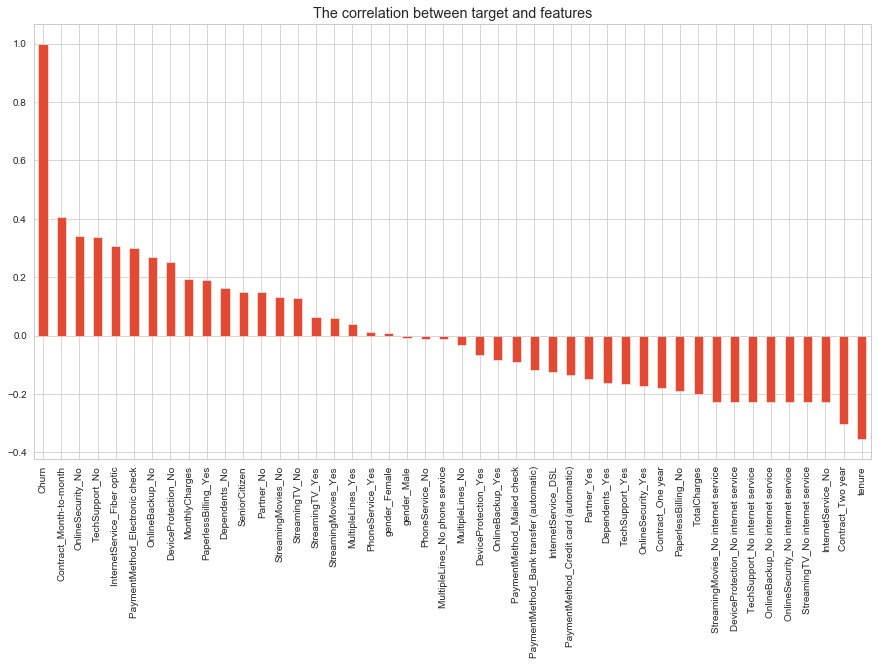

In [11]:
plt.style.use("ggplot")
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.title('The correlation between target and features')
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Section 1 - EDA

### 1.1 Randomly pick features to see their distribution
<b>gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling</b>
    
- <b>gender:</b> Whether the customer is a male or a female
- <b>SeniorCitizen:</b> Whether the customer is a senior citizen or not (1, 0)
- <b>Partner:</b> Whether the customer has a partner or not (Yes, No)
- <b>Dependents:</b> Whether the customer has dependents or not (Yes, No)
- <b>PhoneService:</b> Whether the customer has a ohone service or not (Yes, No)
- <b>PaperlessBilling:</b> Whether the customer has paperless billing or not (Yes, No)

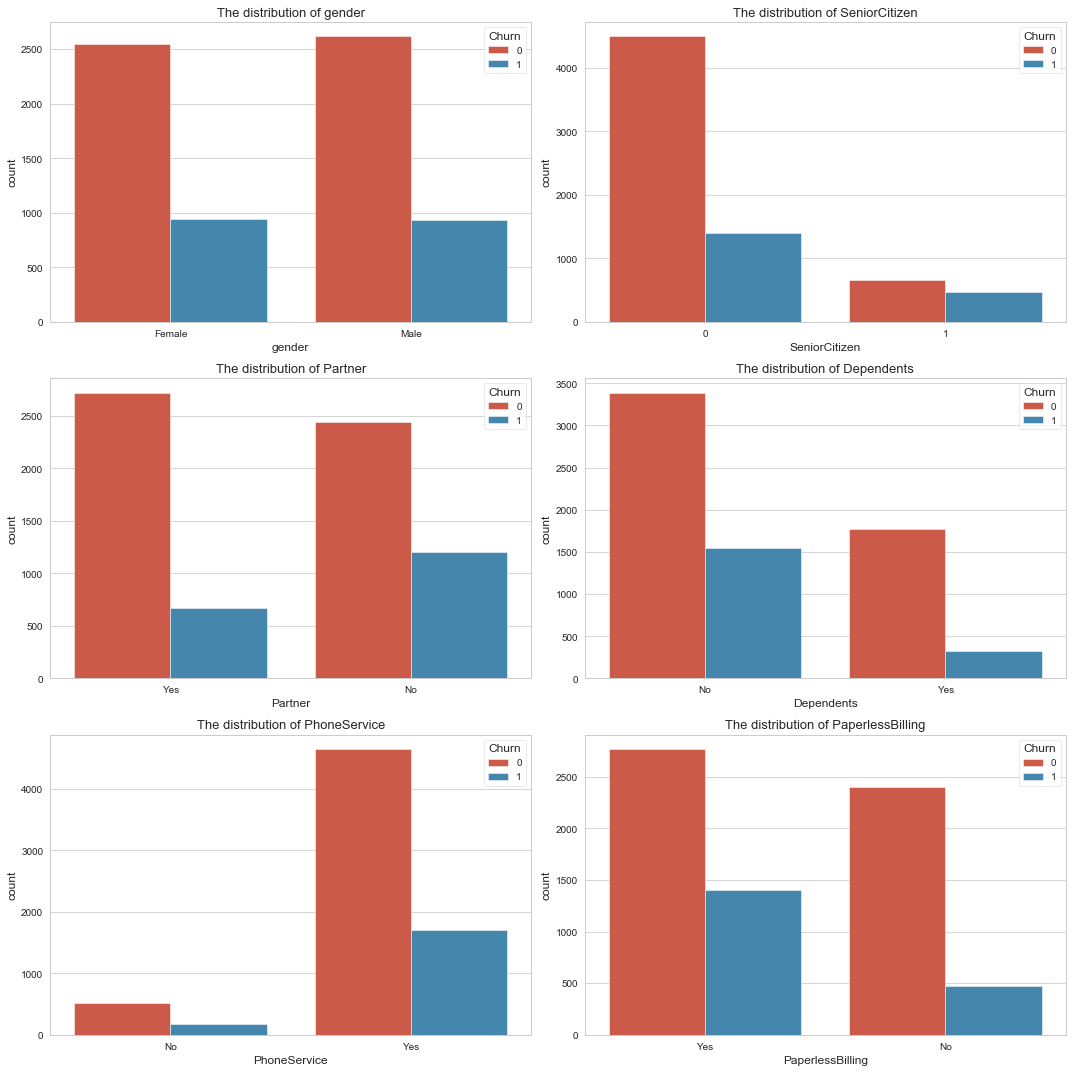

In [12]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('gender', data=df1, hue='Churn')
plt.title('The distribution of gender', fontsize=13)
plt.tight_layout()

plt.subplot(3, 2, 2)
sns.countplot('SeniorCitizen', data=df1, hue='Churn')
plt.title('The distribution of SeniorCitizen', fontsize=13)
plt.tight_layout()

plt.subplot(3, 2, 3)
sns.countplot('Partner', data=df1, hue='Churn')
plt.title('The distribution of Partner', fontsize=13)
plt.tight_layout()

plt.subplot(3, 2, 4)
sns.countplot('Dependents', data=df1, hue='Churn')
plt.title('The distribution of Dependents', fontsize=13)
plt.tight_layout()

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', data=df1, hue='Churn')
plt.title('The distribution of PhoneService', fontsize=13)
plt.tight_layout()

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=df1, hue='Churn')
plt.title('The distribution of PaperlessBilling', fontsize=13)
plt.tight_layout()

<b>Interpretations:</b>

- It's not surprised to see gender column doesn't have much impact on the target, which verifies the correlation coefficient plot above. 
- Phone service also has a small influence on the target.
- The senior citizen are more likely to churn.
- Also we found there are two interesting columns: partner and dependents. We will take a close look at these two features first.

### 1.2 Partner & Dependents
- <b>Partner:</b>  if a customer has a partner
- <b>Dependents:</b>  if a customer has dependents

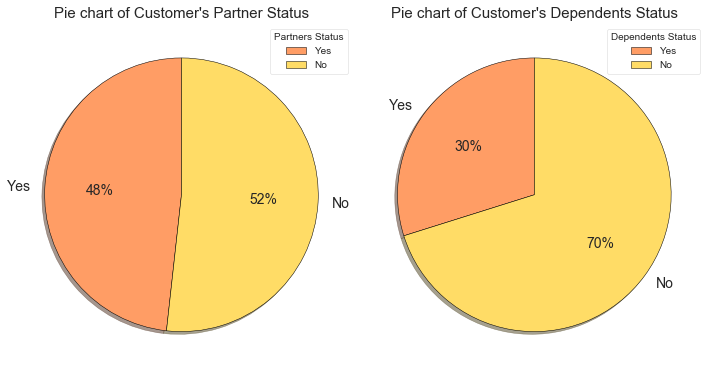

In [13]:
partner = pd.DataFrame({'Partner':['Yes','No'],
                        'Count':[len(df[df['Partner']=='Yes']),len(df[df['Partner']=='No'])]})
dependent = pd.DataFrame({'Dependents':['Yes','No'],
                        'Count':[len(df[df['Dependents']=='Yes']),len(df[df['Dependents']=='No'])]})

colors = ['#FF9D65','#FFDC66']

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Pie chart of Customer's Partner Status", fontsize=15)
plt.pie(data=partner,x='Count',labels='Partner',startangle=90, textprops={'fontsize': 14},
        colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.legend(title='Partners Status',loc="best")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.title("Pie chart of Customer's Dependents Status", fontsize=15)
plt.pie(data=dependent,x='Count',labels='Dependents',startangle=90, textprops={'fontsize': 14},
        colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.legend(title='Dependents Status',loc="best")
plt.tight_layout()

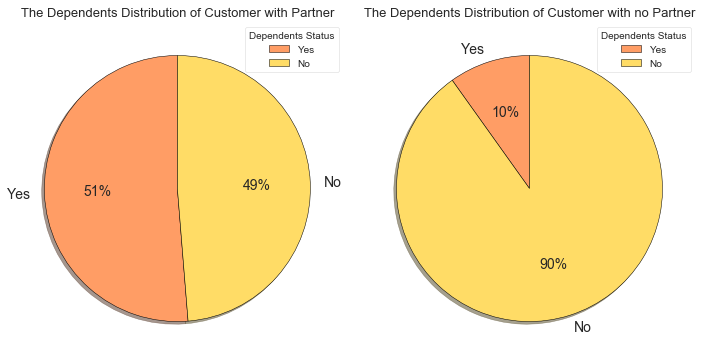

In [14]:
df1 = df[df['Partner']=='No']
df2 = df[df['Partner']=='Yes']
partner_yes = pd.DataFrame({'Dependents':['Yes','No'],
                            'Count':[len(df2[df2['Dependents']=='Yes']),len(df2[df2['Dependents']=='No'])]})
partner_no = pd.DataFrame({'Dependents':['Yes','No'],
                            'Count':[len(df1[df1['Dependents']=='Yes']),len(df1[df1['Dependents']=='No'])]})

plt.figure(figsize=(10, 8))


plt.subplot(1, 2, 1)
plt.pie(data=partner_yes,x='Count',labels='Dependents',startangle=90, textprops={'fontsize': 14},
        colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.title('The Dependents Distribution of Customer with Partner', fontsize=13)
plt.legend(title='Dependents Status',loc="best")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie(data=partner_no,x='Count',labels='Dependents',startangle=90, textprops={'fontsize': 14},
        colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.title('The Dependents Distribution of Customer with no Partner', fontsize=13)
plt.legend(title='Dependents Status',loc="best")
plt.tight_layout()

We can see from above, customer who has a partner, only half of them have dependents, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents.

### 1.3 Monthly payment & Total payment
- <b>Monthly Charges:</b> a customer’s monthly charge 
- <b>Total Charges:</b> a customer’s total charges 

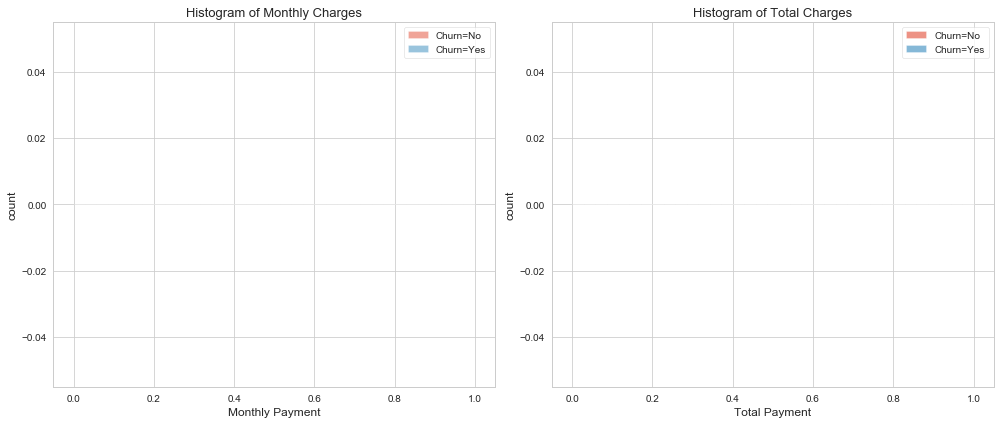

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df1[df1.Churn == 0].MonthlyCharges.hist(bins=35, alpha=0.5, label='Churn=No')
df1[df1.Churn == 1].MonthlyCharges.hist(bins=35, alpha=0.5, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.ylabel('count')
plt.legend()
plt.title('Histogram of Monthly Charges', fontsize=13)
plt.tight_layout()

plt.subplot(1, 2, 2)
df1[df1.Churn == 0].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
df1[df1.Churn == 1].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Total Payment')
plt.ylabel('count')
plt.legend()
plt.title('Histogram of Total Charges', fontsize=13)
plt.tight_layout()

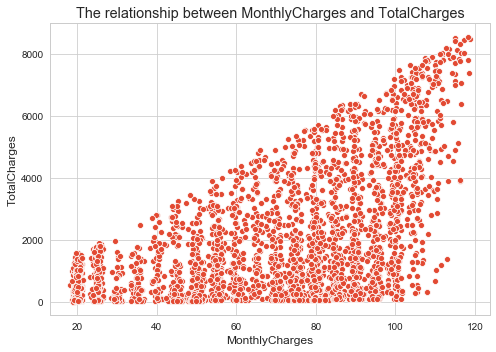

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df1, x='MonthlyCharges', y='TotalCharges')
plt.title('The relationship between MonthlyCharges and TotalCharges')
plt.tight_layout()

Total charges and monthly charges are two related features, if one is important to the target, another must also be important.

### 1.4 Tenure & Contract
- <b>Tenure:</b> if a customer is a tenure and how long
- <b>Contract:</b> if a customer has a contract with the company and how long

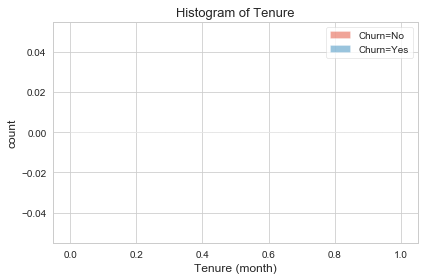

In [17]:
df1[df1.Churn == 0].tenure.hist(bins=35, alpha=0.5, label='Churn=No')
df1[df1.Churn == 1].tenure.hist(bins=35, alpha=0.5, label='Churn=Yes')
plt.xlabel('Tenure (month)')
plt.ylabel('count')
plt.legend()
plt.title('Histogram of Tenure', fontsize=13)
plt.tight_layout()


From the histogram above we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company. And also it seems like this feature has a great influence on our target.

In [18]:
import plotly.express as px
fig = px.histogram(df, x='Contract', color='Contract', title='The distribution of Contract', template='none')
fig.show()

Most of the customers are in the month-to-month contract which can verify the tenure distribution above. There are equal numbers of customers are in one-year and two-year contract.

Text(0.5, 1.0, 'Two Year Contract')

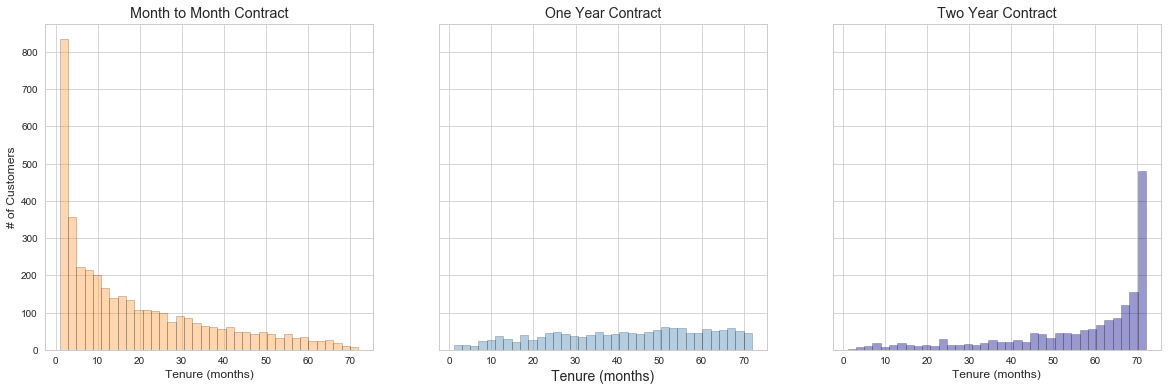

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = '#FF9935',
                   hist_kws={'edgecolor':'black'},
                   ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

From here it's easy to tell most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

### 1.5 Churn - Target column
<b>Churn:</b> if a customer leave the company 

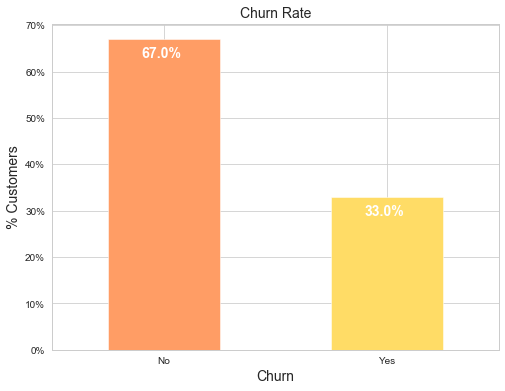

In [20]:
ax = (df1['Churn'].value_counts()*100.0 /len(df1)).plot(kind='bar',stacked = True, rot = 0, color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

## Section 2 - Modeling

### Data Normalization

In [21]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### 2.1 Random Forest

####  2.1.1 Base Model: RF

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
results = cross_val_score(model, X_train, y_train, cv=3)
print(f"Accuracy: {round(results.mean()*100, 2)}%")

Accuracy: 78.83%


#### 1.1.2 Model Tuning

##### Parameter tuning using GridSearchCV: RF
- **n_estimators**: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. So we should choose as high value as the processor can handle because this makes the predictions stronger and more stable.
- **max_features**: These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features. Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, for sure, the speed of algorithm will decrease by increasing the max_features. Here are a few of them :
  - *Auto/None* : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree.
  - *sqrt* : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree.”log2″ is another similar type of option for max_features.
  - *0.2* : This option allows the random forest to take 20% of variables in individual run. We can assign and value in a format “0.x” where we want x% of features to be considered.
- **max_depth**: Each tree in the random forest model makes multiple splits to isolate homogeneous groups of outcomes. Larger numbers of splits allowed in each tree enables the trees to explain more variation in the data, however, trees with many splits may overfit the data.
- **min_samples_split**: We can control the minimum number of samples required to split each node. Values too large may cause <ins>under-fitting</ins>, as the trees won’t be able to split enough times to achieve node purity. This hyperparameter should be based on the number of records in the training dataset.
- **min_samples_leaf**: Much like stopping the growth of trees once a minimum number of samples per split is reached, we can set the minimum number of samples required for each leaf. With values too large, the trees may not be able to split enough to capture sufficient variation in the data. Optimal values for this hyperparameter are dependent on the size of the training set.
- **bootstrap**: method for sampling data points (with or without replacement)
- **n_jobs**: This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [int(x) for x in np.linspace(start=10, stop=80, num=10)],
              'max_features': range(2, 12),
              'max_features': ['auto','sqrt'],
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,2],
              'bootstrap': [True, False]}
rdf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
rdf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [25]:
print('The score of the grid is:',rdf.best_score_)

# extract the best parameter
for key, val in rdf.best_params_.items():
    print(f"Best hyperparameter is {key}: {val}")   

The score of the grid is: 0.7976888888888889
Best hyperparameter is bootstrap: True
Best hyperparameter is max_features: auto
Best hyperparameter is min_samples_leaf: 2
Best hyperparameter is min_samples_split: 2
Best hyperparameter is n_estimators: 64


In [26]:
best_RF_model = rdf.best_estimator_

#### 1.1.3 Model Performance Evluation

##### Get Repeated Hold Out Accurary of optimal Random Forest Model
- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the optimal Random Forest Model is 78.49% 

In [27]:
from sklearn.pipeline import make_pipeline
rf_pipe = make_pipeline(best_RF_model)
rf_pipe.fit(X_train, y_train)
pipe_pred_rf = rf_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(rf_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(rf_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.7913
cv_acc_std 0.0146


##### Confusion Matrix

In [28]:
y_pred_rf = best_RF_model.predict(X_test)

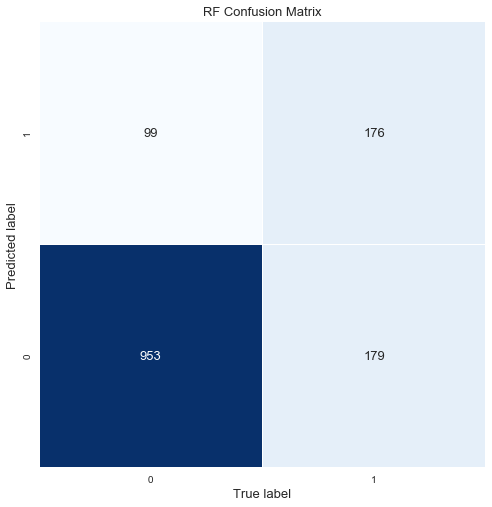

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_rf)
ax = plt.subplot()
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 13},cbar=False,fmt="d",
                       cmap= "Blues", linewidths=.2)
ax.set_ylim([0,2])
plt.title('RF Confusion Matrix',y=-0.1, fontsize=13)
plt.xlabel('True label',y=-0.1, fontsize=13)
plt.ylabel('Predicted label', fontsize=13)

fig = plt.gcf()
fig.set_size_inches(8, 9, forward=True)

##### Classification Report

In [102]:
from sklearn.metrics import classification_report
# Evaluate our model
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1052
           1       0.64      0.50      0.56       355

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [103]:
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_rf)*100,2)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_rf)*100,2)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_pred_rf)*100,2)}%")
print(f"F1-score: {round(metrics.f1_score(y_test,y_pred_rf)*100,2)}%")

Precision:  64.0%
Recall:  49.58%
Accuracy: 80.24%
F1-score: 55.87%


##### ROC and AUC for RF

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test data.
probs = rf_pipe.predict_proba(X_test)

#Keep Probabilities of the positive class only
probs = probs[:, 1]

In [32]:
#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("Area Under Curve (AUC) = ",metrics.auc(fpr,tpr))

Area Under Curve (AUC) =  0.8305159856477267


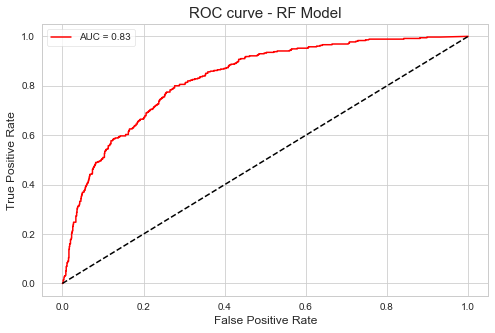

In [33]:
# define the roc curve function
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % metrics.auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate',fontdict={'size':12})
    plt.ylabel('True Positive Rate', fontdict={'size':12})
    plt.title('ROC curve - RF Model', fontsize=15)
    plt.legend()
    plt.show()

# Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

#### 1.1.4 Feature Importance

In [34]:
feature_imp = pd.DataFrame(best_RF_model.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp = feature_imp.reset_index()
feature_imp = feature_imp.rename(columns={"index": "Feature"})
feature_imp

Feature  importance
0                              TotalCharges    0.149329
1                                    tenure    0.136827
2                            MonthlyCharges    0.110994
3                   Contract_Month-to-month    0.063819
4                            TechSupport_No    0.039854
5                         OnlineSecurity_No    0.036877
6            PaymentMethod_Electronic check    0.036156
7               InternetService_Fiber optic    0.032491
8                         Contract_Two year    0.026769
9                           OnlineBackup_No    0.018616
10                      InternetService_DSL    0.017223
11                        Contract_One year    0.016716
12                      DeviceProtection_No    0.016630
13                            gender_Female    0.016521
14                              gender_Male    0.015958
15                            SeniorCitizen    0.015547
16                       OnlineSecurity_Yes    0.015074
17                      PaperlessBilling_No    0.013935
18                     PaperlessBilling_Yes    0.013620
19                         MultipleLines_No    0.013243
20                              Partner_Yes    0.012899
21                               Partner_No    0.012578
22                         OnlineBackup_Yes    0.011242
23                          TechSupport_Yes    0.010846
24                      StreamingMovies_Yes    0.010465
25                          StreamingTV_Yes    0.010360
26               PaymentMethod_Mailed check    0.009967
27    PaymentMethod_Credit card (automatic)    0.009922
28                        MultipleLines_Yes    0.009895
29  PaymentMethod_Bank transfer (automatic)    0.009860
30                       StreamingMovies_No    0.009838
31                            Dependents_No    0.009775
32                     DeviceProtection_Yes    0.009728
33                           StreamingTV_No    0.009643
34                           Dependents_Yes    0.009619
35       OnlineSecurity_No internet service    0.006264
36          TechSupport_No internet service    0.005406
37                       InternetService_No    0.004843
38     DeviceProtection_No internet service    0.003604
39                          PhoneService_No    0.003459
40           MultipleLines_No phone service    0.003446
41                         PhoneService_Yes    0.003100
42         OnlineBackup_No internet service    0.003097
43          StreamingTV_No internet service    0.002072
44      StreamingMovies_No internet service    0.001875

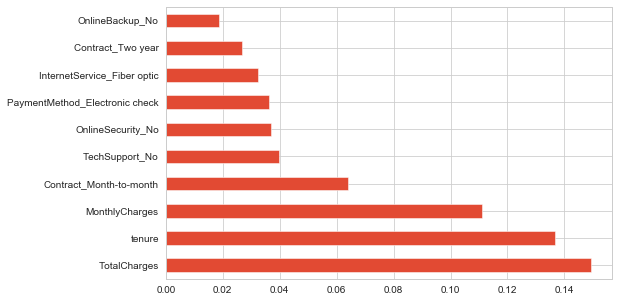

In [36]:
importances_rf = best_RF_model.feature_importances_
feat_importances_rf = pd.Series(best_RF_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feat_importances_rf.nlargest(10).plot(kind='barh')

**Interpretation**: Tenure, total charges and monthly charges are necessary predictors. Tenure means a customer is tenure for how long. This is obvious to see, when a customer is tenure for a long time may mean he would like to spend more time on this platform, which is the same as the charges. A customer is more willing to pay for the platform, he will be more willing to stay. Also, monthly charges and total charges are two related features, it’s not surprising to see they are both in the top predictors list. For other top predictors, we can see, customers who have no technical support, no online security and who prefer using checks for payment are more likely to stay.

### 2.2 K Nearest Neighbor (KNN)
- The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It assumes that similar things exist in close proximity. In other words, similar things are near to each other.

#### 2.2.1 Base KNN Model: KNN

In [38]:
# Importing the KNN model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Accuracy of base KNN: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy of base KNN: 76.97%


#### 2.2.2 Sensitivity Analysis: 4 appears to be the best value for K so far
- Number of neighbors (K) is a hyper parameter of the KNN model. As we decrease the value of K to 1, our predictions become less stable. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

##### Building the KNN models by assigning the value of K from 1 to 30

In [39]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

##### Plot model accuracy for different number of Neighbors
- The accury of the model increase sharping as K increase from 0 to around 4
- The variation of the accuracy is small after K reach around 4.

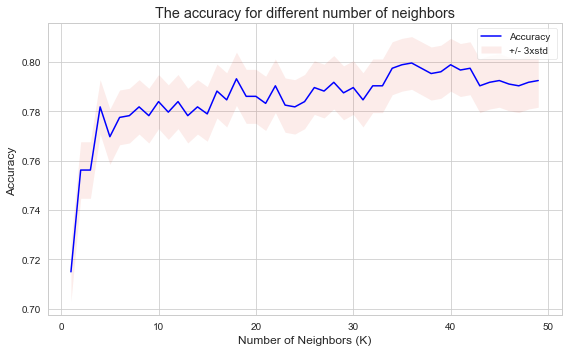

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1,Ks),mean_acc,'g',color='blue')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.title('The accuracy for different number of neighbors')
plt.tight_layout()
plt.show()

#### 2.2.3 More parameter tuning using GridSearchCV: KNN
- **Number of neighbors (K)** 
    - To select the K that’s right for our data, we run the KNN algorithm several times with different values of K。
    - If the number of neighbors is too large, the model will have high bias. If the number of neighors is too small, the model will have high variance (overfitting).  
    - Choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.
    
- **Distance functions**
    - Euclidean: sqrt(sum((x - y)^2))
    - Manhattan: sum(|x - y|)
    - Minkowski: sum(|x - y|^p)^(1/p)
 
- **Weight Options**
    - uniform: all points in the neighborhood are weighted equally
    - distance: weights closer neighbors more heavily than further neighbors
    
- **CV = 10 & scoring = 'accuracy'**
    - Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
    - KNN model is being fit and predictions are being made 8 x 10 = 80 times

In [41]:
# Possible hyperparamter options for KNN
parameters = {
    'n_neighbors':[4,5,6],
    'metric':['minkowski','euclidean','manhattan'],
    'weights':['uniform','distance']
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10,scoring='accuracy')
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [4, 5, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [42]:
best_KNN_model = Grid_KNN.best_estimator_

In [43]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name,':',str(best_parameters[param_name]))

# print best parameter 
print_grid_search_metrics(Grid_KNN)

Best score: 0.7688937630765535
Best parameters set
metric : manhattan
n_neighbors : 6
weights : uniform


#### 2.2.4 Model Performance Evaluation
##### Get Repeated Hold Out Accurary of optimal KNN Model
- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the KNN model is 77.14% 

In [44]:
from sklearn.pipeline import make_pipeline

knn_pipe = make_pipeline(best_KNN_model)
knn_pipe.fit(X_train, y_train)
pipe_pred = knn_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(knn_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(knn_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.7714
cv_acc_std 0.0195


##### Confusion Matrix 

In [45]:
y_pred_KNN = best_KNN_model.predict(X_test)

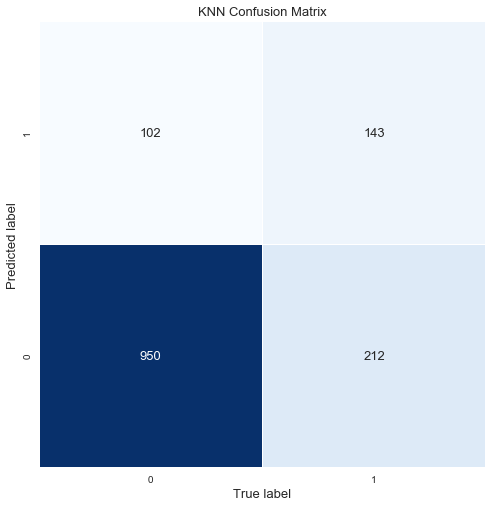

In [46]:
mat = confusion_matrix(y_test, y_pred_KNN)
ax = plt.subplot()
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 13},cbar=False,fmt="d",
                       cmap= 'Blues', linewidths=.2)
ax.set_ylim([0,2])
plt.title('KNN Confusion Matrix',y=-0.1, fontsize=13)
plt.xlabel('True label',y=-0.1, fontsize=13)
plt.ylabel('Predicted label', fontsize=13)

fig = plt.gcf()
fig.set_size_inches(8, 9, forward=True)

In [94]:
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_KNN)*100,2)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_KNN)*100,2)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_pred_KNN)*100,2)}%")
print(f"F1-score: {round(metrics.f1_score(y_test,y_pred_KNN)*100,2)}%")

Precision:  58.37%
Recall:  40.28%
Accuracy: 77.68%
F1-score: 47.67%


##### Classification Report

In [48]:
print(metrics.classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1052
           1       0.58      0.40      0.48       355

    accuracy                           0.78      1407
   macro avg       0.70      0.65      0.67      1407
weighted avg       0.76      0.78      0.76      1407



##### ROC Curve and AUC for KNN

In [49]:
# Use predict_proba to get the probability results of KNN Model
from sklearn.metrics import roc_curve
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

In [50]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.7831441118192042

<Figure size 432x288 with 0 Axes>

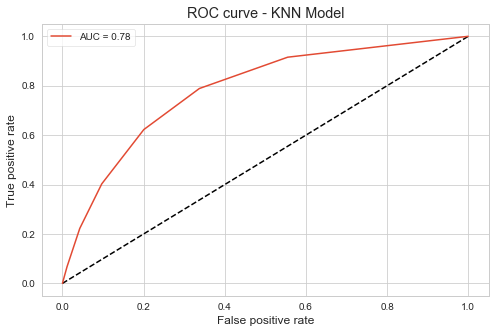

In [51]:
# ROC Curve
plt.figure(1)
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='AUC = %0.2f' % metrics.auc(fpr_knn,tpr_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

**Interpretation:** The model performance isn’t greatly improved with these best parameters. The f1-score of the model 0.48 is the lowest among all the model. One of the possible reasons is that we have a mixture of categorical and continuous variables, which affect the models’ ability to reflect the distances among datapoints. 

### 2.3 Gradient Boosting Machine 
####  2.3.1 Base Model: GBM

In [52]:
from sklearn.ensemble import GradientBoostingClassifier as gbm
num_trees = 100
gbm_model = gbm(n_estimators=num_trees, random_state=16)
results = cross_val_score(gbm_model, X_train, y_train)
print(f"Accuracy for GBM: {round(results.mean()*100, 2)}%")

Accuracy for GBM: 80.14%


#### 2.3.2 Discussion on Overfitting for Gradient Boosting Machine:
- **We can generally address the overfitting for a gradient boosted machine in by**
    - Reducing the number of dependent features by removing all non-significant and correlated features from the data set.
    - Increasing the number of training examples.
- **In cases when we don't change the number of features or unable to increase traning sample, we use regularisation to smoothen the cost function and reduce high variance and increase bias.**
   - Regularization via shrinkage (learning_rate < 1.0) improves performance considerably. 
   - In combination with shrinkage, stochastic gradient boosting (subsample < 1.0) can produce more accurate models by reducing the variance via bagging. 
   - Therefore, we experiment with subsample and learning rate.

#### 2.3.3 Model Tuning
##### Parameter tuning using GridSearchCV: GBM
- **loss**: loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
-  **learning_rate**: learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. 
- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
-  **max_depth(default=3)**: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
-  **subsample(default=1.0)**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': np.arange(0.02, 0.1, 0.02),
              'n_estimators': range(60, 160, 50),
              'max_depth': range(2, 10),
              'loss':['deviance','exponential'],
              'subsample':[1,0.5]}
gbm_clf = GridSearchCV(gbm(), param_grid)
gbm_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [54]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name,':',str(best_parameters[param_name]))

# print best parameter 
print_grid_search_metrics(gbm_clf)

Best score: 0.8062222222222223
Best parameters set
learning_rate : 0.08
loss : deviance
max_depth : 2
n_estimators : 110
subsample : 0.5


In [98]:
# best gradient boosting machine 
best_GBM_model = gbm_clf.best_estimator_

#### 2.3.4 Model Performance Evluation
##### Get Repeated Hold Out Accurary of Optimal GBM Model
- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the optimal GBM model is 80.25%

In [56]:
gbm_pipe = make_pipeline(best_GBM_model)
gbm_pipe.fit(X_train, y_train)
pipe_pred = gbm_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(gbm_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(gbm_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.8025
cv_acc_std 0.0141


##### Confusion Matrix

In [99]:
y_pred_gbm = best_GBM_model.predict(X_test)

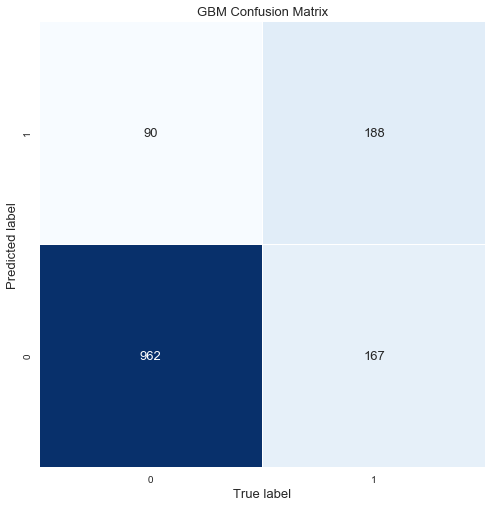

In [58]:
mat = confusion_matrix(y_test, y_pred_gbm)
ax = plt.subplot()
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 13},cbar=False,fmt="d",
                       cmap= 'Blues', linewidths=.2)
ax.set_ylim([0,2])
plt.title('GBM Confusion Matrix',y=-0.1, fontsize=13)
plt.xlabel('True label',y=-0.1, fontsize=13)
plt.ylabel('Predicted label', fontsize=13)

fig = plt.gcf()
fig.set_size_inches(8, 9, forward=True)

In [101]:
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_gbm)*100,2)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_gbm)*100,2)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_pred_gbm)*100,2)}%")
print(f"F1-score: {round(metrics.f1_score(y_test,y_pred_gbm)*100,2)}%")

Precision:  67.63%
Recall:  52.96%
Accuracy: 81.73%
F1-score: 59.4%


##### Classification Report

In [60]:
print(metrics.classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.68      0.53      0.59       355

    accuracy                           0.82      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



##### ROC and AUC for GBM


In [61]:
# Use predict_proba to get the probability results of KNN Model
y_pred_gbm = best_GBM_model.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, thresh = roc_curve(y_test, y_pred_gbm)

In [62]:
# AUC score
print("Area Under Curve (AUC) = ",metrics.auc(fpr_gbm,tpr_gbm))

Area Under Curve (AUC) =  0.8418518716863922


<Figure size 432x288 with 0 Axes>

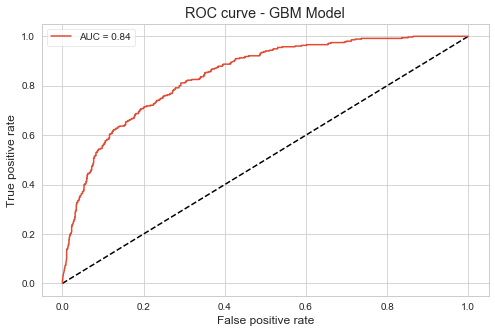

In [63]:
# ROC Curve
plt.figure(1)
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbm, tpr_gbm, label='AUC = %0.2f' % metrics.auc(fpr_gbm,tpr_gbm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - GBM Model')
plt.legend(loc='best')
plt.show()

#### 2.3.5 Feature Importance

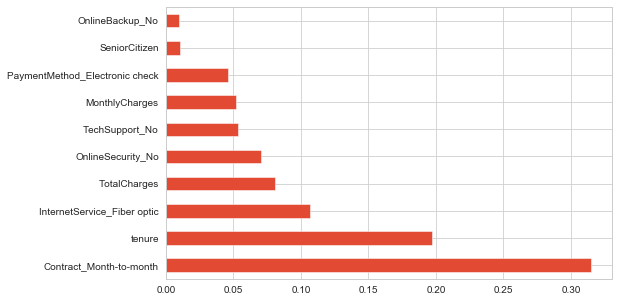

In [64]:
importances_gbm = best_GBM_model.feature_importances_
feat_importances_gbm = pd.Series(best_GBM_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feat_importances_gbm.nlargest(10).plot(kind='barh')

**Interpretation:** The three most important features obtained from the GBM are “Contract month to month”, “tenure”, and “Internet Service Fiber Optic”. Compared to the feature importance obtained from the Random Forest model, “tenure” is still among the top 3. The other two features are more important in the GBM than in RF. For users who have month to month contracts, they have better mobility than those who have a fixed term contract with telecom companies. For this group of users, they don’t have to worry about the consequences of breaking a contract when they make decisions to leave companies. For users who have internet service fiber optic, they are also more likely to churn, which indicates that customers’ satisfaction to internet services is critical in retaining customers.

### 2.4 Logistic Regression
####  2.4.1 Base Model: LR

In [65]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(f"Accuracy of base Logistic Regression: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy of base Logistic Regression: 81.45%


#### 2.4.2 Model Tuning
##### Parameter tuning using GridSearchCV: LR
- Parameter ‘C’ controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple.  For small values of C, we increase the regularization strength which will create simple models which underfit the data and vice versa.
- penalty{‘l1’, ‘l2’}, default=’l2’. It is used to specify the norm used in the penalization. 

In [66]:
parameters = {
    'C':np.geomspace(1e-5,1e5,num=20),
    'penalty':["l1","l2"]
}
Grid_LR = GridSearchCV(LR,parameters, cv=10,scoring='accuracy')
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 3....
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
      

In [67]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name,':',str(best_parameters[param_name]))

print_grid_search_metrics(Grid_LR)

Best score: 0.8012487120977478
Best parameters set
C : 6.1584821106602545
penalty : l2


In [105]:
best_LR_model = Grid_LR.best_estimator_

#### 2.4.3 Model Performance Evluation
##### Get Repeated Hold Out Accurary of Optimal LR Model
- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the optimal LR model is 80.02%

In [69]:
LR_pipe = make_pipeline(best_LR_model)
LR_pipe.fit(X_train, y_train)
pipe_pred = LR_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(LR_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(LR_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.8002
cv_acc_std 0.012


##### Confusion Matrix

In [106]:
y_pred_LR = best_LR_model.predict(X_test)

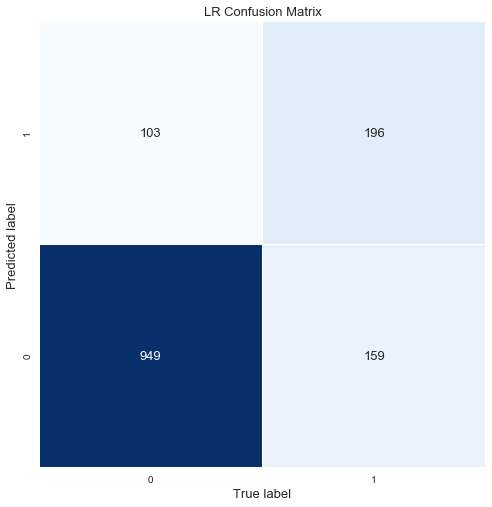

In [71]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_LR)
ax = plt.subplot()
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 13},cbar=False,fmt="d",
                       cmap= 'Blues', linewidths=.2)
ax.set_ylim([0,2])
plt.title('LR Confusion Matrix',y=-0.1, fontsize=13)
plt.xlabel('True label',y=-0.1, fontsize=13)
plt.ylabel('Predicted label', fontsize=13)

fig = plt.gcf()
fig.set_size_inches(8, 9, forward=True)

In [107]:
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_LR)*100,2)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_LR)*100,2)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_pred_LR)*100,2)}%")
print(f"F1-score: {round(metrics.f1_score(y_test,y_pred_LR)*100,2)}%")

Precision:  65.55%
Recall:  55.21%
Accuracy: 81.38%
F1-score: 59.94%


##### Classification Report

In [73]:
print(metrics.classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.66      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407



##### ROC Curve and AUC for Logistic Regression

In [74]:
y_pred_LR = best_LR_model.predict_proba(X_test)[:, 1]
fpr_LR, tpr_LR, thresh = roc_curve(y_test, y_pred_LR)
roc_auc = metrics.auc(fpr_LR, tpr_LR)

In [75]:
print("Area Under Curve (AUC) = ",roc_auc)

Area Under Curve (AUC) =  0.84083569860226


<Figure size 432x288 with 0 Axes>

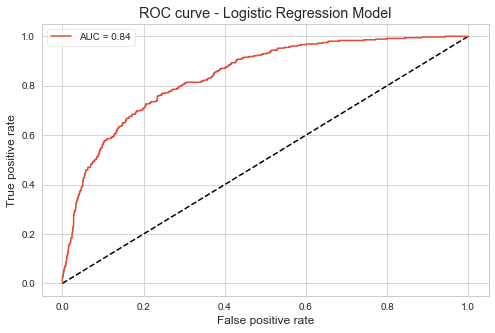

In [76]:
plt.figure(1)
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LR, tpr_LR,label='AUC = %0.2f' % metrics.auc(fpr_LR, tpr_LR))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Logistic Regression Model')
plt.legend(loc='best')
plt.show()

##### Feature Importance

In [77]:
feat_importances_lr = pd.DataFrame(best_LR_model.coef_[0], index=X_train.columns,
columns=['coefficient']).sort_values('coefficient', ascending=False)
feat_importances_lr = feat_importances_lr.reset_index()
feat_importances_lr = feat_importances_lr.rename(columns={"index": "Feature"})
feat_importances_lr['abs'] = feat_importances_lr['coefficient'].abs()
feat_importances_lr

Feature  coefficient       abs
0                              TotalCharges     2.001365  2.001365
1                   Contract_Month-to-month     0.701114  0.701114
2               InternetService_Fiber optic     0.672479  0.672479
3            PaymentMethod_Electronic check     0.268590  0.268590
4                           StreamingTV_Yes     0.260141  0.260141
5                         OnlineSecurity_No     0.244490  0.244490
6                       StreamingMovies_Yes     0.240783  0.240783
7                            TechSupport_No     0.227397  0.227397
8                             SeniorCitizen     0.205419  0.205419
9                      PaperlessBilling_Yes     0.131222  0.131222
10                        MultipleLines_Yes     0.126834  0.126834
11                     DeviceProtection_Yes     0.093701  0.093701
12                          OnlineBackup_No     0.093423  0.093423
13                         OnlineBackup_Yes     0.044259  0.044259
14                      DeviceProtection_No     0.043981  0.043981
15                            Dependents_No     0.033266  0.033266
16                          PhoneService_No     0.002937  0.002937
17           MultipleLines_No phone service     0.002937  0.002937
18                              gender_Male    -0.008300  0.008300
19                               Partner_No    -0.022610  0.022610
20                        Contract_One year    -0.030336  0.030336
21                              Partner_Yes    -0.030498  0.030498
22  PaymentMethod_Bank transfer (automatic)    -0.032002  0.032002
23                            gender_Female    -0.044808  0.044808
24                         PhoneService_Yes    -0.056045  0.056045
25                           Dependents_Yes    -0.086373  0.086373
26                          TechSupport_Yes    -0.089715  0.089715
27                       StreamingMovies_No    -0.103100  0.103100
28                       OnlineSecurity_Yes    -0.106808  0.106808
29                           StreamingTV_No    -0.122458  0.122458
30               PaymentMethod_Mailed check    -0.130523  0.130523
31    PaymentMethod_Credit card (automatic)    -0.159172  0.159172
32                         MultipleLines_No    -0.182879  0.182879
33                      PaperlessBilling_No    -0.184330  0.184330
34          StreamingTV_No internet service    -0.190790  0.190790
35          TechSupport_No internet service    -0.190790  0.190790
36     DeviceProtection_No internet service    -0.190790  0.190790
37      StreamingMovies_No internet service    -0.190790  0.190790
38       OnlineSecurity_No internet service    -0.190790  0.190790
39                       InternetService_No    -0.190790  0.190790
40         OnlineBackup_No internet service    -0.190790  0.190790
41                      InternetService_DSL    -0.534797  0.534797
42                        Contract_Two year    -0.723886  0.723886
43                           MonthlyCharges    -1.657311  1.657311
44                                   tenure    -3.682969  3.682969

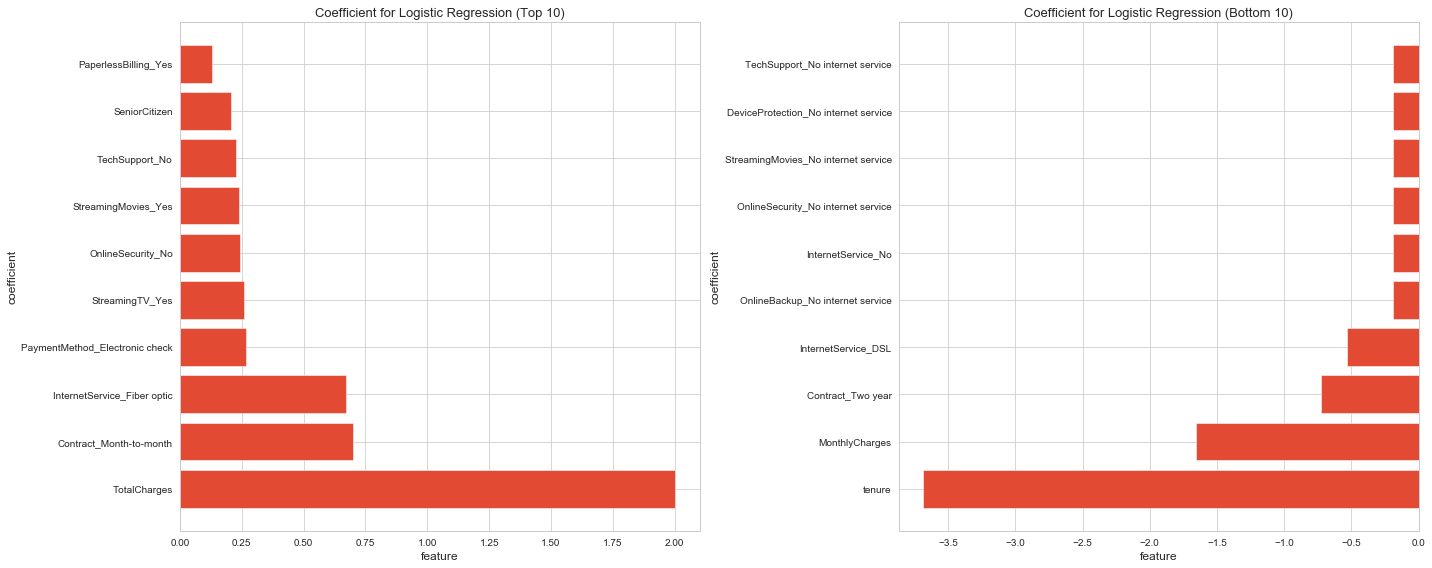

In [78]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.barh(data=feat_importances_lr.sort_values(ascending=False, by='coefficient')[:10], width='coefficient',y='Feature')
plt.ylabel('coefficient',fontsize=12)
plt.xlabel('feature',fontsize=12)
plt.title('Coefficient for Logistic Regression (Top 10)',fontsize=13)
#plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.barh(data=feat_importances_lr.sort_values(ascending=True, by='coefficient')[:10], width='coefficient',y='Feature')
plt.ylabel('coefficient',fontsize=12)
plt.xlabel('feature',fontsize=12)
plt.title('Coefficient for Logistic Regression (Bottom 10)',fontsize=13)
#plt.xticks(rotation='vertical')
plt.tight_layout()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text xticklabel objects>)

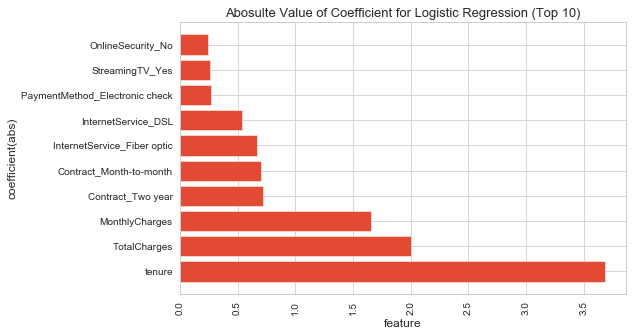

In [79]:
plt.figure(figsize=(8,5))
plt.barh(data=feat_importances_lr.sort_values(ascending=False, by='abs')[:10], width='abs',y='Feature')
plt.ylabel('coefficient(abs)',fontsize=12)
plt.xlabel('feature',fontsize=12)
plt.title('Abosulte Value of Coefficient for Logistic Regression (Top 10)',fontsize=13)
plt.xticks(rotation='vertical')

**Interpretation:** The top 10 important features of Logistic Regression model are tenure, TotalCharges, MonthlyCharges, Contract_Two year, Contract_Month-to-month, InternetService_Fiber optic, InternetService_DSL, PaymentMethod_Electronic check, StreamingTV_Yes and OnlineSecurity_No.


### 2.5 Linear SVM
####  2.5.1 Base Model: Linear SVM

In [80]:
from sklearn import svm 
from sklearn.svm import SVC
from sklearn import model_selection
LS = svm.LinearSVC() 
LS

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

#### 2.4.2 Model Tuning
##### Parameter tuning using GridSearchCV: LS
- C, default=1.0. Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
- penalty{‘l1’, ‘l2’}, default=’l2’. Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

In [81]:
bs = model_selection.ShuffleSplit(n_splits=25,test_size=0.3,random_state=0) 
param_grid = {'C':[0.25,0.5,0.75,1],'penalty':['l2']}
Grid_LS = GridSearchCV(LS,param_grid,cv=bs) 
Grid_LS.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=25, random_state=0, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name,':',str(best_parameters[param_name]))

print_grid_search_metrics(Grid_LS)

Best score: 0.7963744075829383
Best parameters set
C : 0.5
penalty : l2


In [83]:
best_LS_model = Grid_LS.best_estimator_

#### 2.5.3 Model Performance Evluation
##### Get Repeated Hold Out Accurary of Optimal Linear SVM Model
- **Cross validation:** Use 10-fold Cross Validation to give a more accurate indication of how well the model generalizes to unseen data.
- **Model Performance Evaluation:** The model accuracy of the optimal Linear SVM model is 79.64%

In [84]:
from sklearn.pipeline import make_pipeline

LS_pipe = make_pipeline(best_LS_model)
LS_pipe.fit(X_train, y_train)
pipe_pred = LS_pipe.predict(X_test)
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=16)
print('cv_acc_mean',round(cross_val_score(LS_pipe, X_train, y_train, cv=cv).mean(),4))
print('cv_acc_std',round(cross_val_score(LS_pipe, X_train, y_train, cv=cv).std(),4))

cv_acc_mean 0.7964
cv_acc_std 0.0136


##### Confusion Matrix

In [85]:
y_pred_LS = best_LS_model.predict(X_test)

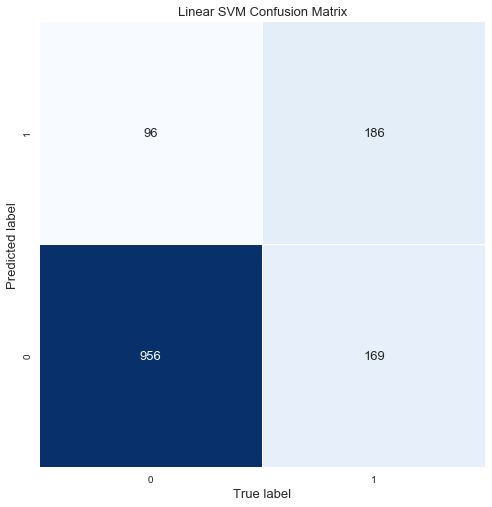

In [86]:
mat = confusion_matrix(y_test, y_pred_LS)
ax= plt.subplot()
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 13},cbar=False,fmt="d",
                       cmap= 'Blues', linewidths=.2)
ax.set_ylim([0,2])
plt.title('Linear SVM Confusion Matrix',y=-0.1, fontsize=13)
plt.xlabel('True label',y=-0.1, fontsize=13)
plt.ylabel('Predicted label', fontsize=13)

fig = plt.gcf()
fig.set_size_inches(8, 9, forward=True)

In [87]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_LS)*100, 2)}%")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_LS)*100, 2)}%")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_LS)*100,2)}%")
print(f"F1-Score: {round(metrics.f1_score(y_test, y_pred_LS)*100, 2)}%")

Accuracy: 81.17%
Precision: 65.96%
Recall: 52.39%
F1-Score: 58.4%


##### Classification Report

In [88]:
print(metrics.classification_report(y_test, y_pred_LS))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.66      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



##### ROC Curve and AUC for Linear SVM Model

In [89]:
y_pred_LS = best_LS_model._predict_proba_lr(X_test)[:, 1]
fpr_LS, tpr_LS, thresh = roc_curve(y_test, y_pred_LS)
roc_auc = metrics.auc(fpr_LS, tpr_LS)

In [90]:
print("Area Under Curve (AUC) = ",roc_auc)

Area Under Curve (AUC) =  0.8355285706635249


<Figure size 432x288 with 0 Axes>

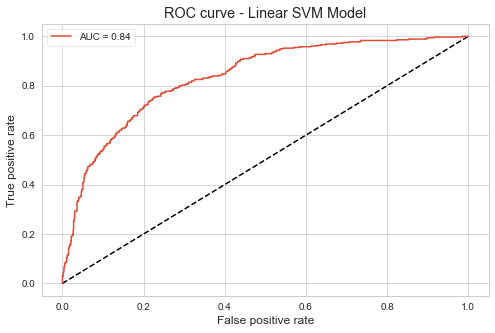

In [91]:
plt.figure(1)
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LS, tpr_LS,label='AUC = %0.2f' % metrics.auc(fpr_LS,tpr_LS))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Linear SVM Model')
plt.legend(loc='best')
plt.show()

**Interpretation:** Using GridSearchCV( ), we got the best hyper parameters set with C of 0 and penalty of l2. From the classification report results we observed that SVM, Gradient Boosting Machine, and Random Forest algorithm have similar performance. Their precisions are quite closed, which is around 0.8.

## Section 3: Model Performance 

### 3.1 Evaluation Metric 
- Accuracy won’t be a good indication of model performance since we have imbalanced data. In our data, 26.6% of the customers churned while 73.4% of the customer did not churn. If we use accuracy as the evaluation metrics, we could be seeing many false negatives cases.
- As for ROC-AUC, in general, the ROC is used for many different levels of thresholds and thus it has many F score values. ROC averages over all possible thresholds and we don’t know the specific Precession and Recall at a given point. However, for the F score to be high, both precision and recall should be high.
- we would like to use F1-score, which is defined as the harmonic mean of the model's precision and recall, to be our primary evaluation metric. F1-Score keeps a balance between Precision and Recall. 

### 3.2 Model Performance Summary 

In [1]:
from plotly import graph_objects as go
fig = go.Figure(layout = {"title":  "Model Performance Master Table"},
                data=[go.Table(header=dict(values=["Algorithm","Key hyperparamters","Precision","Recall","Accuracy","F1-Score","ROC AUC Score"]),
                cells=dict(values=[["Logistic Regression","GBM","Linear SVM","Random Forest","KNN"],
                                   [
                                    "C:6.158, penalty:l2",
                                    "learning_rate:0.06, loss:exponential, max_depth:2, n_estimators:110, subsample:0.5",
                                    "C:0.5, penalty:l2",
                                 "bootstrap:True, max_feature:auto, min_sample_leaf:2, min_sample_split:5, n_estimators:25",
                                    "metric:manhattan, n_neighbors:6, weights:uniform"
                                    ],
                                   ["65.55%","66.20%","66.08%","65.70%","58.37%"], #Precision
                                   ["55.21%","53.52%","52.68%","51.27%","40.28%"], #Recall
                                   ["81.38%","81.38%","81.24%","80.95%","77.68%"], #Accuracy
                                   ["59.94%","59.40%","58.40%","55.87%","47.67%"], #F1-score
                                   ["84.08%","84.28%","83.55%","82.84%","78.31%"], #ROC_AUC_Score
                                   ]))
                    ])
fig.update_layout(width=1000,height=550)
fig.show()

Using F1-scores as the key evaluation metrics, the rankings of our machine learning models are: Logistic Regression (59.94%), Gradient Boosting Machine (59.40%), Linear SVM (58.40%), Random Forest (55.87%), and K-Nearest Neighbor (47.76%). Logistic regression has several advantages when we apply it to real business problems. It is easy to implement, interpret and efficient to train. Running logistic regression is not as time consuming as running other models such as support vector machine and gradient boosting machine.